# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [152]:
import cv2
import os
import requests
import numpy as np
import matplotlib.pyplot as plt

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanej biblioteki request), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [153]:
url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = 'lut.py'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

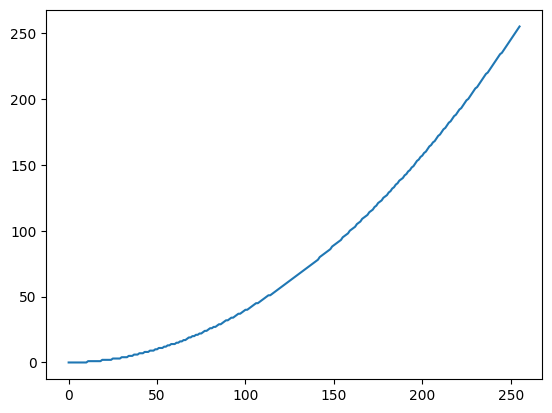

In [154]:
import lut

plt.plot(lut.kwadratowa)

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

In [155]:
fileName = 'lena.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

fileName = 'jet.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

In [156]:
def show_image( image ):
    plt.imshow(image)
    plt.xticks([]), plt.yticks([])
    plt.show()

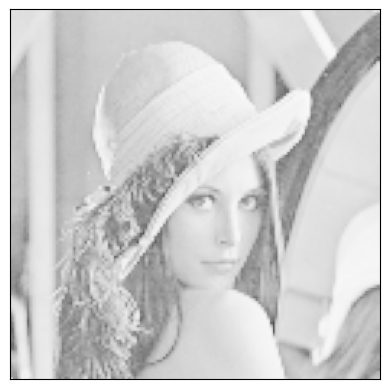

In [157]:
image = cv2.imread("lena.bmp")

converted_image = cv2.LUT(image, lut.log)

show_image(converted_image)

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

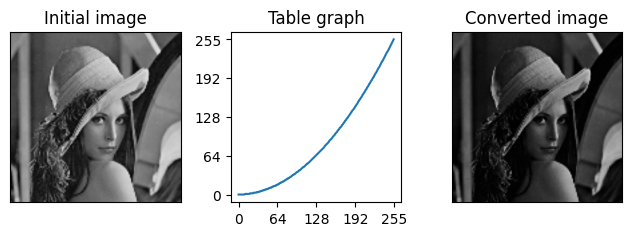

In [158]:
def create_subfigure(image, fig, title, column):
    fig.add_subplot(1, 3, column)
    plt.imshow(image)
    plt.xticks([]), plt.yticks([])
    plt.title(title)

def LUT(image, table, title = ""):
    if len(title) > 0:
        print(title)
        
    converted_image = cv2.LUT(image, table)
    fig = plt.figure()
    create_subfigure(image, fig, "Initial image", 1)

    x = np.linspace(0, 255, 256)
    
    ax = fig.add_subplot(1, 3, 2)
    ax.set_aspect('equal')

    plt.plot(x, table)
    plt.title("Table graph")
    
    ranges = [0, 64, 128, 192, 255]
    plt.xticks(ranges), plt.yticks(ranges)
    
    create_subfigure(converted_image, fig, "Converted image", 3)

    fig.tight_layout(pad=1)
    plt.show()

LUT(image, lut.kwadratowa)

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

square


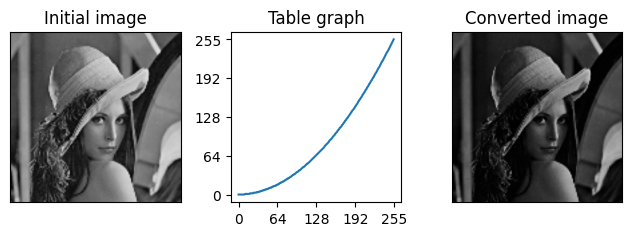

log


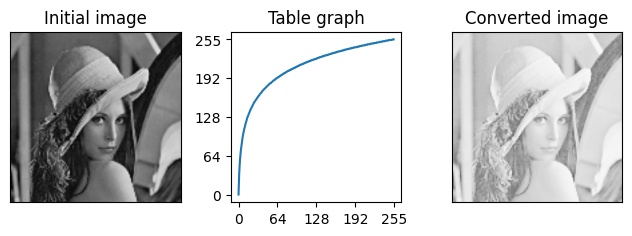

reversed log


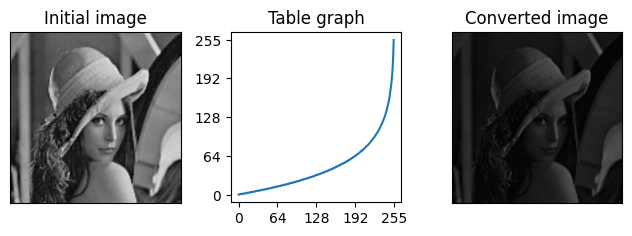

root


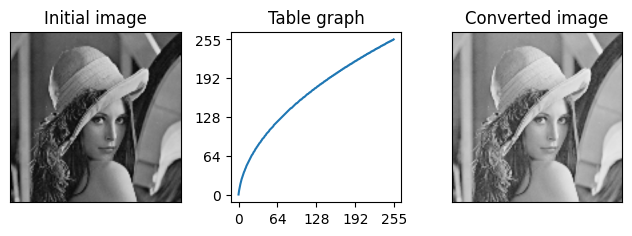

reversed


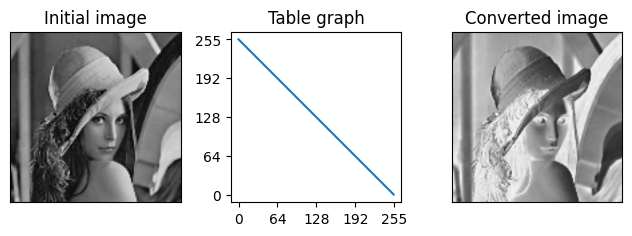

sharp


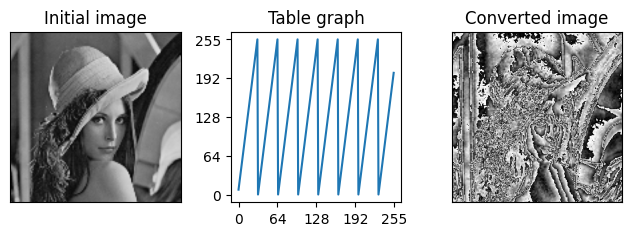

exponential


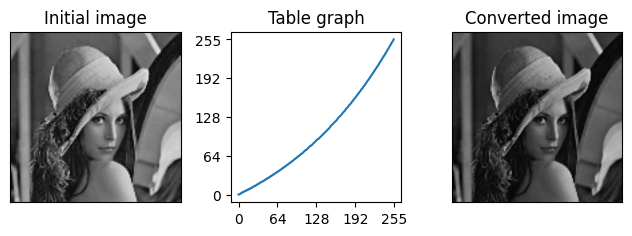

In [159]:
LUT(image, lut.kwadratowa, title="square")
LUT(image, lut.log, title="log")
LUT(image, lut.odwlog, title="reversed log")
LUT(image, lut.pierwiastkowa, title="root")
LUT(image, lut.odwrotna, title="reversed")
LUT(image, lut.pila, title="sharp")
LUT(image, lut.wykladnicza, title="exponential")

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

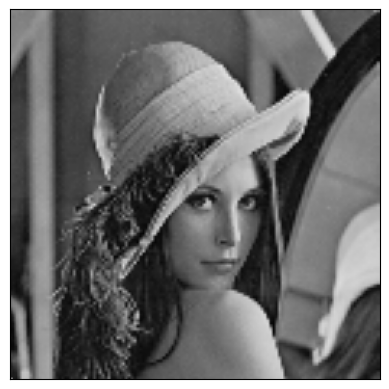

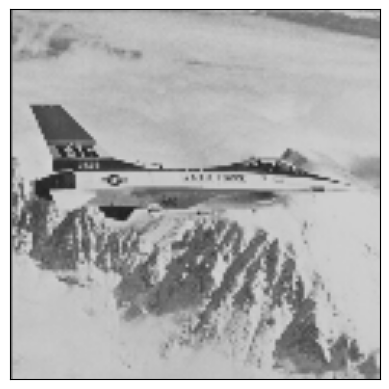

In [160]:
image_lena = cv2.imread("lena.bmp")
image_jet = cv2.imread("jet.bmp")

show_image(image_lena)
show_image(image_jet)

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

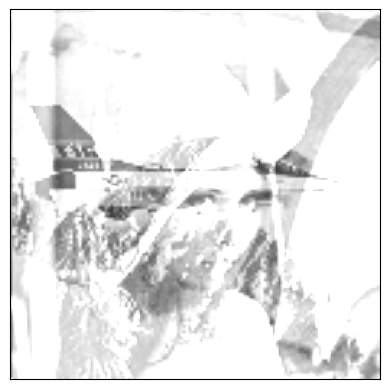

In [161]:
image_sum = cv2.add(image_lena, image_jet)
show_image(image_sum)

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`) dla arguemntów dodawania.
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić.
**Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki.**

In [162]:
def get_max(image):
    result = -float('inf')
    for row in image:
        for col in row:
            for v in col:
                result = max(result, v)
    return result

def get_min(image):
    result = float('inf')
    for row in image:
        for col in row:
            for v in col:
                result = min(result, v)
    return result

scaled by 2


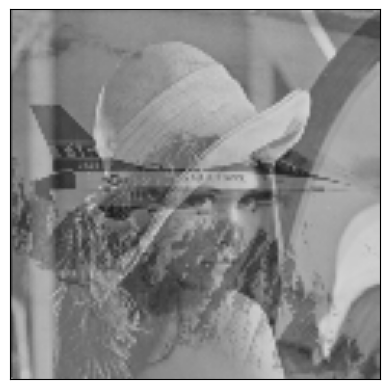

scaled by max value


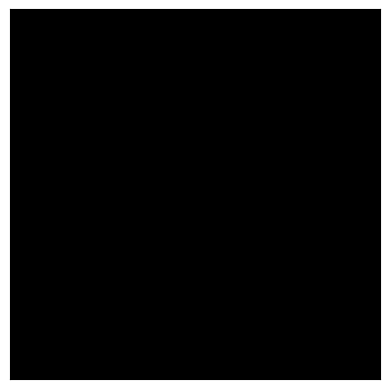

In [163]:
image_sum = cv2.add(image_lena.astype('uint16'), image_jet.astype('uint16'))
image_sum_scaled = image_sum // 2
image_sum_scaled_max = image_sum // get_max(image_sum)
print('scaled by 2')
show_image(image_sum_scaled)
print('scaled by max value')
show_image(image_sum_scaled_max)

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

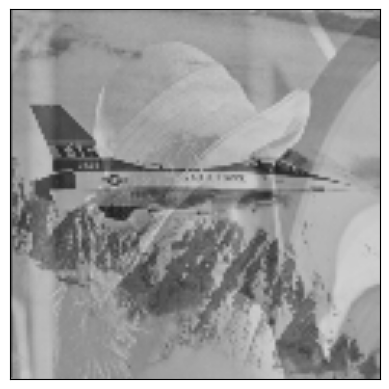

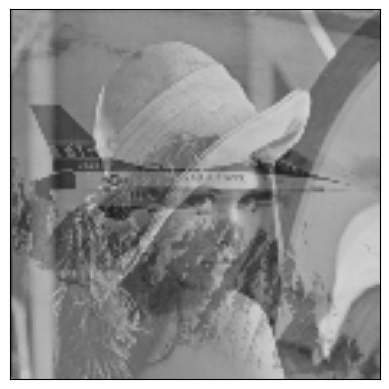

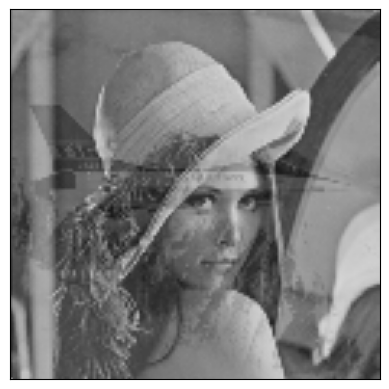

In [164]:
def show_blended(image1, image2, alpha):
    beta = (1 - alpha)
    image_blended = cv2.addWeighted(image1, alpha, image2, beta, 0)
    show_image(image_blended)

show_blended(image_lena, image_jet, 0.3)
show_blended(image_lena, image_jet, 0.5)
show_blended(image_lena, image_jet, 0.7)

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

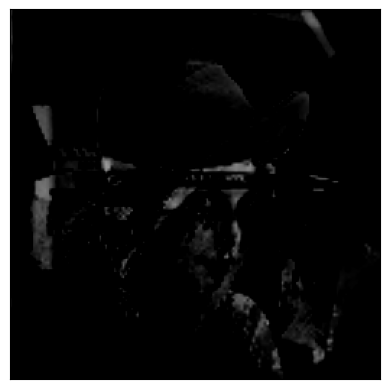

In [165]:
image_subtract = cv2.subtract(image_lena, image_jet)
show_image(image_subtract)

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ argumentów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


without abs


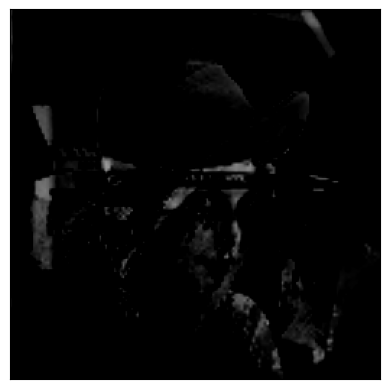

with abs


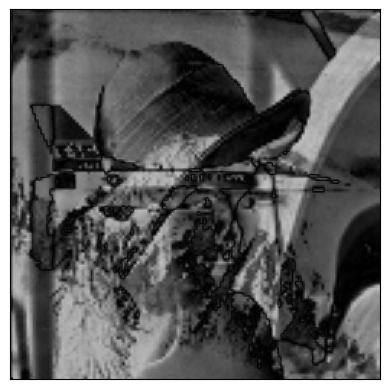

In [166]:
image_subtract = cv2.subtract(image_lena.astype('int16'), image_jet.astype('int16'))
image_subtract_abs = np.abs(image_subtract)
print("without abs")
show_image(image_subtract)
print("with abs")
show_image(image_subtract_abs)


### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

Przed wykonaniem mnożenia zamień typ arguemntów na **float64**. Wynik mnożenia przeskaluj do zakresu 0-255, a następnie zrzutuj na typ **uint8**.

Scaled using simple division by 256


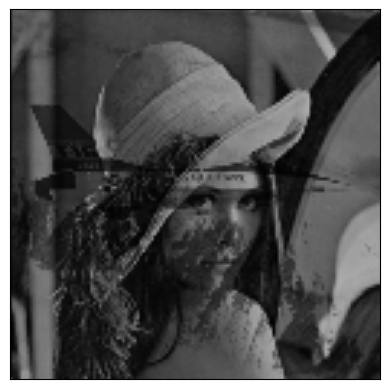

Scaled using rescale function


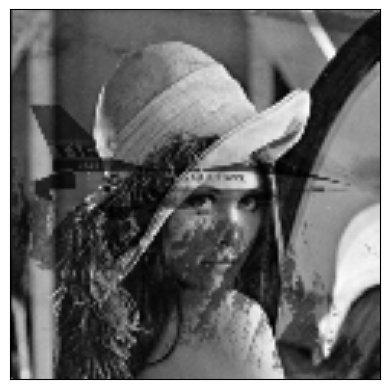

In [167]:

def rescale(image):
    min_image = get_min(image)
    max_image = get_max(image)
    return (image - min_image) / (max_image - min_image) * 255

image_multiply = cv2.multiply(image_lena.astype('float64'), image_jet.astype('float64'))
image_multiply_rescaled1 = (image_multiply // 256).astype('uint16')
image_multiply_rescaled2 = rescale(image_multiply).astype('uint16')

print("Scaled using simple division by 256")
show_image(image_multiply_rescaled1)
print("Scaled using rescale function")
show_image(image_multiply_rescaled2)


Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

In [168]:
fileName = 'kolo.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

bitwise_not


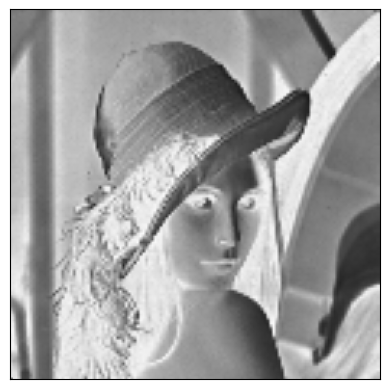

table


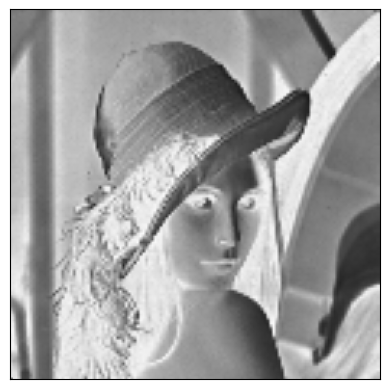

In [169]:
print("bitwise_not")
image_negative_cv2 = cv2.bitwise_not(image_lena)
show_image(image_negative_cv2)
print("table")
image_negative_lut = cv2.LUT(image_lena, lut.odwrotna)
show_image(image_negative_cv2)

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

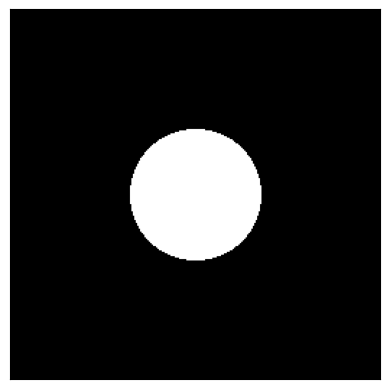

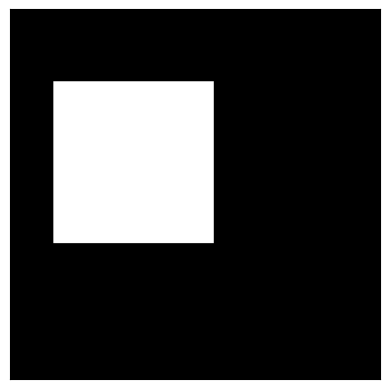

In [170]:
fileName = 'kwadrat.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

image_circle = cv2.imread('kolo.bmp')
image_square = cv2.imread('kwadrat.bmp')

show_image(image_circle)
show_image(image_square)

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

bitwise not


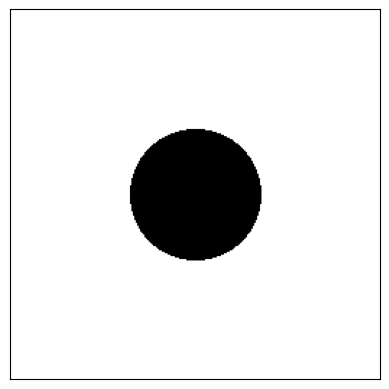

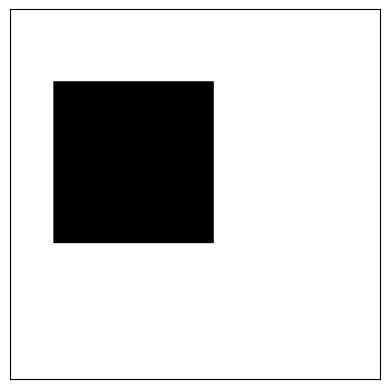

bitwise and


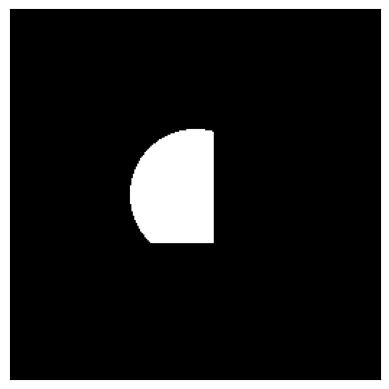

bitwise or


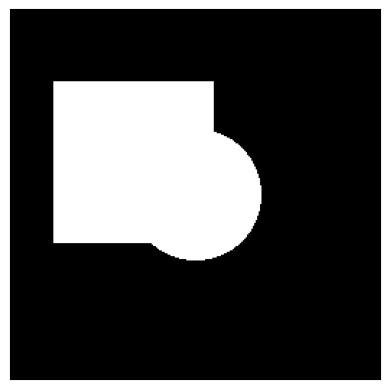

bitwise xor


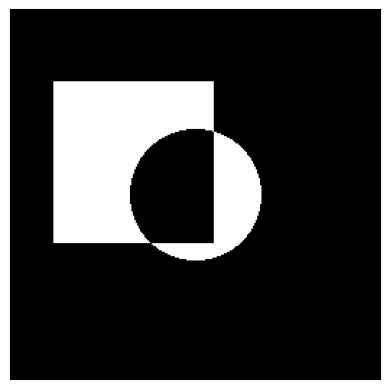

In [171]:
print("bitwise not")
show_image(cv2.bitwise_not(image_circle))
show_image(cv2.bitwise_not(image_square))
print("bitwise and")
show_image(cv2.bitwise_and(image_circle, image_square))
print("bitwise or")
show_image(cv2.bitwise_or(image_circle, image_square))
print("bitwise xor")
show_image(cv2.bitwise_xor(image_circle, image_square))
